Libraries

In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Binarizer, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

Import Data

In [33]:
data = pd.read_csv('Raw Dataset\Bank Customer Churn Prediction.csv')
data.drop('customer_id', axis=1, inplace=True)
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [43]:
TARGET = 'churn'
NUMERICAL = data.select_dtypes('number').drop(['products_number',TARGET], axis=1).columns.to_list()
CATEGORICAL = np.setdiff1d(data.columns, NUMERICAL)[1:]
print(f'Target : {TARGET}')
print(f'Numerical Features : {NUMERICAL}')
print(f'Categorical Features : {CATEGORICAL}')

Target : churn
Numerical Features : ['credit_score', 'age', 'tenure', 'balance', 'credit_card', 'active_member', 'estimated_salary']
Categorical Features : ['country' 'gender' 'products_number']


Exploratory Data Analysis

In [26]:
data.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [10]:
# universal figsize
figsize=(5,5)

<AxesSubplot:title={'center':'Count Plot of Churn'}, xlabel='churn', ylabel='count'>

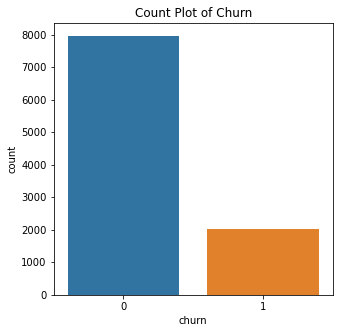

In [30]:
plt.figure(figsize=figsize)
plt.title('Count Plot of Churn')
sns.countplot(x = data['churn']) # imbalance data, might have to do oversampling later

<AxesSubplot:title={'center':'Estimated Salary Distribution'}, xlabel='estimated_salary', ylabel='Count'>

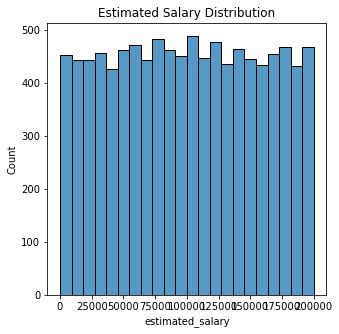

In [18]:
plt.figure(figsize=figsize)
plt.title('Estimated Salary Distribution')
sns.histplot(data=data['estimated_salary'])

Preprocess

In [60]:
class Encoder(BaseEstimator, TransformerMixin) :
    def __init__(self, features, drop='first') :
        self.features = features
        self.drop = drop
    def fit(self, X, y=None) :
        self.encoder = OneHotEncoder(drop=self.drop)
        return self
    def transform(self, X) :
        X_transformed = pd.concat([X.drop(self.features, axis=1),
                                   pd.DataFrame(self.encoder.fit_transform(X[self.features]).toarray(), columns=self.encoder.get_feature_names(self.features))], axis=1)
        return X_transformed

class Scaler(BaseEstimator, TransformerMixin) :
    def __init__(self, features) :
        self.features = features
    def fit(self, X, y=None) :
        self.scaler = StandardScaler()
        return self
    def transform(self, X):
        X_transformed = X.copy()
        X_transformed[self.features] = pd.DataFrame(self.scaler.fit_transform(X[self.features]), columns=self.features)
        return X_transformed

pipe = Pipeline([
    ('OneHotEncoder', Encoder(CATEGORICAL)),
    ('StandardScaler', Scaler(NUMERICAL))
])

preprocessed = pipe.fit_transform(data)

In [61]:
preprocessed

,credit_score,age,tenure,balance,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male,products_number_2,products_number_3,products_number_4
0,-0.326221,0.293517,-1.041760,-1.225848,0.646092,0.970243,0.021886,1,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.440036,0.198164,-1.387538,0.117350,-1.547768,0.970243,0.216534,0,0.0,1.0,0.0,0.0,0.0,0.0
2,-1.536794,0.293517,1.032908,1.333053,0.646092,-1.030670,0.240687,1,0.0,0.0,0.0,0.0,1.0,0.0
3,0.501521,0.007457,-1.387538,-1.225848,-1.547768,-1.030670,-0.108918,0,0.0,0.0,0.0,1.0,0.0,0.0
4,2.063884,0.388871,-1.041760,0.785728,0.646092,0.970243,-0.365276,0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.646092,-1.030670,-0.066419,0,0.0,0.0,1.0,1.0,0.0,0.0
9996,-1.391939,-0.373958,1.724464,-0.306379,0.646092,0.970243,0.027988,0,0.0,0.0,1.0,0.0,0.0,0.0
9997,0.604988,-0.278604,0.687130,-1.225848,-1.547768,0.970243,-1.008643,1,0.0,0.0,0.0,0.0,0.0,0.0
9998,1.256835,0.293517,-0.695982,-0.022608,0.646092,-1.030670,-0.125231,1,1.0,0.0,1.0,1.0,0.0,0.0
